In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data

In [51]:
# load data
with open('data/dataset.json', 'r') as file:
    dataset = json.load(file)

In [52]:
reports_names = list(dataset.keys())
reports_names

['200.19.182.102.txt',
 '200.19.182.106.txt',
 '200.19.182.110.txt',
 'bdsrh.npd.ufc.br.txt',
 'cafe-eid.ufc.br.txt',
 'cafe-idp.ufc.br.txt',
 'dante.ufc.br.txt',
 'memoria.ufc.br.txt',
 'proxy.ufc.br.txt',
 'sadin.ufc.br.txt',
 'servicos.sti.ufc.br.txt',
 'si3.ufc.br.txt',
 'sistemas.prograd.ufc.br.txt',
 'www2.ufc.br.txt']

In [54]:
total_vulnerabilities = []
for report_name in reports_names:
    report = dataset[report_name]
    vulnerabilities = report['vulnerabilidades']
    for vulnerability in vulnerabilities:
        vulnerability['target_name'] = report_name
        total_vulnerabilities.append(vulnerability)

# Target analysis

In [63]:
# analysis per vulnerability
df = pd.DataFrame(total_vulnerabilities)
translate = {'Média': 'Medium', 'Médio':'Medium','Alta':'High','Baixa':'Low',
             'Crítico':'Critical','Crítica':'Critical'}
df['severidade_tipo'] = [translate[i] for i in df['severidade_tipo']]
df.head()

,nome,descrição,impacto,mitigação,owasp_top_10,severidade_score,severidade_tipo,target_name
0,Exposição de Informações no Cabeçalho HTTP,O servidor revela informações sensíveis nos ca...,[A exposição da versão do servidor e do framew...,[Configurar o servidor para não revelar a vers...,A05:2021-Security Misconfiguration,5.3,Medium,200.19.182.102.txt
1,Página de Boas-Vindas Padrão do IIS,O servidor exibe a página padrão do IIS conten...,[A página de boas-vindas padrão pode ser um po...,[Remover ou personalizar completamente a págin...,A05:2021-Security Misconfiguration,5.3,Medium,200.19.182.102.txt
2,Ausência de Respostas para Subdomínios,O scanner DNS não encontrou subdomínios especí...,[A falta de subdomínios não expostos minimiza ...,[Garantir que as configurações de DNS sejam re...,A06:2021-Vulnerable and Outdated Components,5.3,Medium,200.19.182.102.txt
3,Erros Internos de Servidor e Exposição de Cabe...,"Não há evidência direta de erros, mas, caso o ...",[A exposição de mensagens de erro detalhadas p...,[Implementar um sistema de tratamento de erros...,A05:2021-Security Misconfiguration,7.5,High,200.19.182.102.txt
4,Segurança das Portas de Comunicação,O servidor tem as portas 80 (HTTP) e 443 (HTTP...,[A porta 80 (HTTP) está vulnerável a ataques d...,[Configurar o servidor para redirecionar autom...,A06:2021-Vulnerable and Outdated Components,9.1,High,200.19.182.102.txt


In [64]:
# vulnerability per target
df.groupby(['target_name','severidade_tipo']).size()

target_name                  severidade_tipo
200.19.182.102.txt           High               2
                             Medium             4
200.19.182.106.txt           High               2
                             Medium             3
200.19.182.110.txt           Critical           2
                             High               5
bdsrh.npd.ufc.br.txt         Critical           2
                             High               2
                             Medium             2
cafe-eid.ufc.br.txt          High               1
                             Medium             3
cafe-idp.ufc.br.txt          Critical           1
                             Medium             3
dante.ufc.br.txt             Critical           1
                             High               1
                             Medium             3
memoria.ufc.br.txt           Critical           2
                             High               3
proxy.ufc.br.txt             Critical           2
     

In [67]:
df_pivot = df.pivot_table(index="target_name", columns="severidade_tipo", aggfunc="size", fill_value=0)
df_pivot["Total"] = df_pivot.sum(axis=1)
df_pivot

severidade_tipo,Critical,High,Low,Medium,Total
target_name,,,,,
200.19.182.102.txt,0,2,0,4,6
200.19.182.106.txt,0,2,0,3,5
200.19.182.110.txt,2,5,0,0,7
bdsrh.npd.ufc.br.txt,2,2,0,2,6
cafe-eid.ufc.br.txt,0,1,0,3,4
cafe-idp.ufc.br.txt,1,0,0,3,4
dante.ufc.br.txt,1,1,0,3,5
memoria.ufc.br.txt,2,3,0,0,5
proxy.ufc.br.txt,2,1,0,3,6


In [70]:
df_pivot.describe().round(0)

severidade_tipo,Critical,High,Low,Medium,Total
count,14.0,14.0,14.0,14.0,14.0
mean,1.0,2.0,0.0,3.0,6.0
std,1.0,1.0,0.0,2.0,1.0
min,0.0,0.0,0.0,0.0,4.0
25%,0.0,1.0,0.0,2.0,5.0
50%,0.0,2.0,0.0,3.0,6.0
75%,2.0,2.0,0.0,4.0,6.0
max,2.0,5.0,1.0,6.0,8.0


# Vulnerability analysis

# OWASP Vulnerabilities Categories

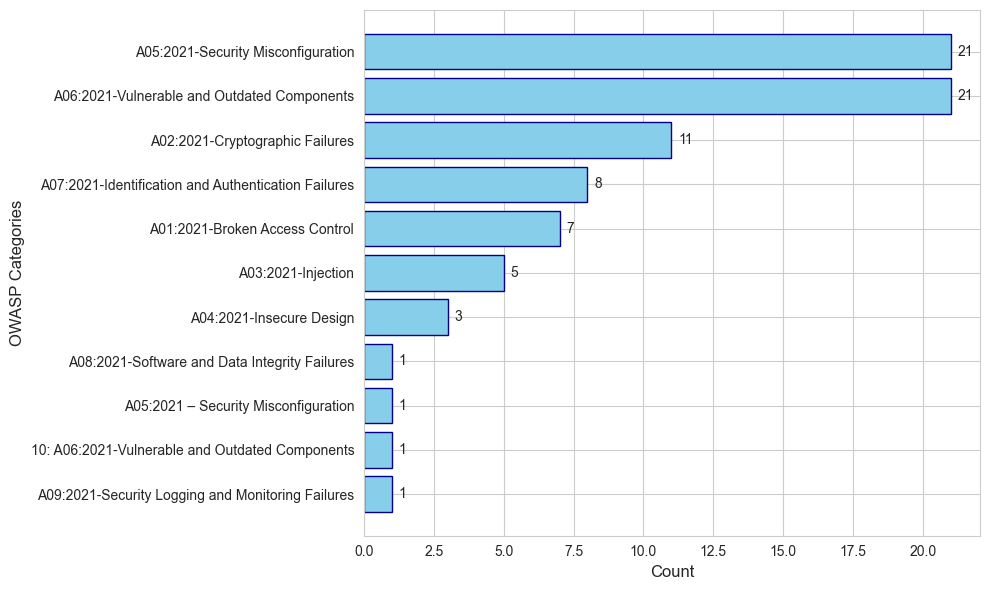

In [47]:
owasp_top_10_series = pd.Series(df_vulnerability['owasp_top_10'])
owasp_top_10_series = owasp_top_10_series.value_counts()

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
bars = plt.barh(owasp_top_10_series.index, owasp_top_10_series.values, color='skyblue', edgecolor='darkblue')
plt.xlabel('Count', fontsize=12)
plt.ylabel('OWASP Categories', fontsize=12)
#plt.title('OWASP 2021 Vulnerabilities - Frequency', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have highest bar on top

# Adding values to bars
for bar in bars:
    plt.text(bar.get_width() + 0.25, bar.get_y() + bar.get_height()/2, 
             str(bar.get_width()), va='center', fontsize=10)
# Save as PDF
plt.savefig("plots/owasp_frequency.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

# Severity calculator

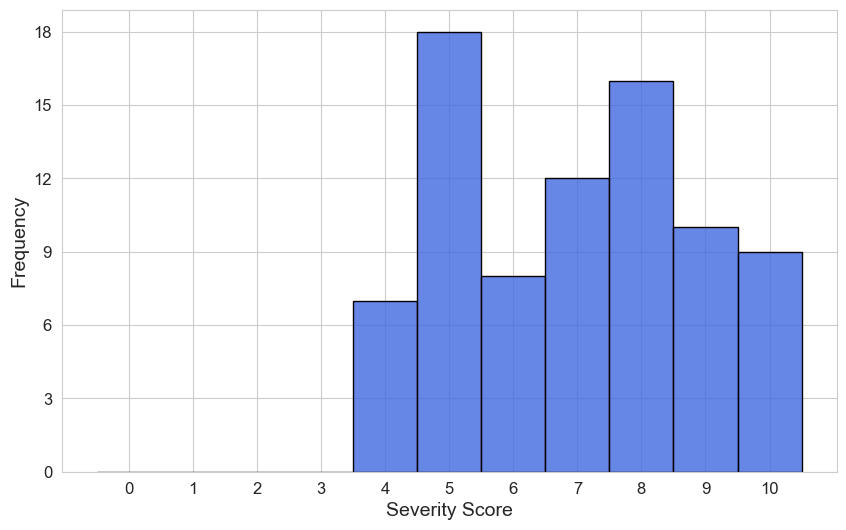

In [46]:
# severity

# Set Seaborn style
sns.set_style("whitegrid")
data = df_vulnerability['severidade_score']
# Create the histogram
# Define bin edges so that each integer is centered
bin_edges = np.arange(-0.5, 11.5, 1)  # From -0.5 to 10.5 with step 1

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=bin_edges, color="royalblue", edgecolor="black", alpha=0.8)

# Customize the plot
#plt.title("Distribution of Severity Scores", fontsize=16)
plt.xlabel("Severity Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(range(0, 11), fontsize=12)  # Ensuring ticks are at integer values
plt.yticks(range(0,20,3),fontsize=12)
# Save as PDF
plt.savefig("plots/histogram_severity_raw.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()


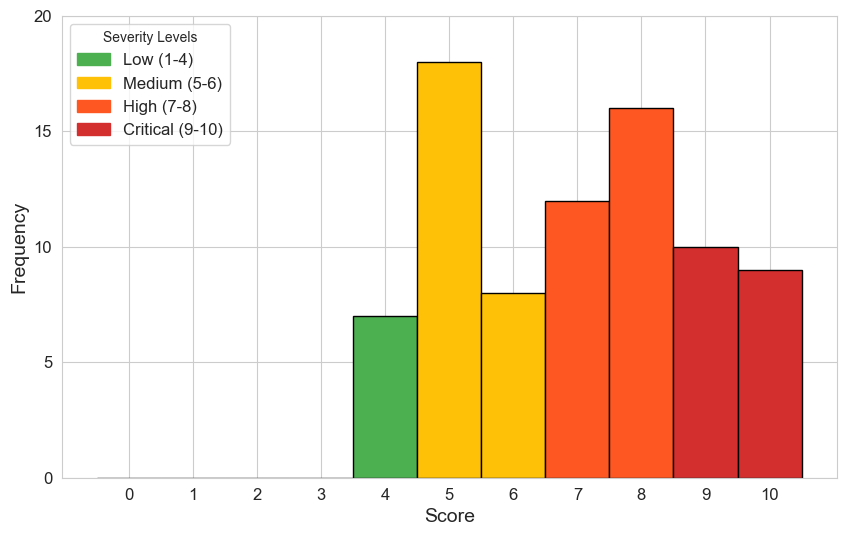

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Define bin edges so that each integer is centered
bin_edges = np.arange(-0.5, 11.5, 1)  # From -0.5 to 10.5 with step 1
bin_centers = np.arange(0, 11, 1)  # Centers of bars

# Define severity levels with corresponding colors
severity_colors = {
    "Low": "#4CAF50",       # Green
    "Medium": "#FFC107",    # Yellow
    "High": "#FF5722",      # Orange
    "Critical": "#D32F2F"   # Red
}

# Assign colors to bins based on severity
colors = []
for x in bin_centers:
    if 1 <= x <= 4:
        colors.append(severity_colors["Low"])
    elif 5 <= x <= 6:
        colors.append(severity_colors["Medium"])
    elif 7 <= x <= 8:
        colors.append(severity_colors["High"])
    elif 9 <= x <= 10:
        colors.append(severity_colors["Critical"])
    else:
        colors.append("#BDBDBD")  # Gray for 0 (if needed)

# Create the histogram with custom colors
plt.figure(figsize=(10, 6))
bars = sns.histplot(data, bins=bin_edges, edgecolor="black", alpha=0.8)

# Change bar colors based on severity
for bar, color in zip(bars.patches, colors):
    bar.set_facecolor(color)

# Customize appearance
#plt.title("Severity Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(range(0, 11), fontsize=12)  # Ensuring ticks are at integer values
plt.yticks(range(0, 25, 5),fontsize=12)

# Create a custom legend
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color=severity_colors["Low"], label="Low (1-4)"),
    mpatches.Patch(color=severity_colors["Medium"], label="Medium (5-6)"),
    mpatches.Patch(color=severity_colors["High"], label="High (7-8)"),
    mpatches.Patch(color=severity_colors["Critical"], label="Critical (9-10)")
]
plt.legend(handles=legend_patches, title="Severity Levels", fontsize=12)

# Save as PDF
plt.savefig("plots/histogram_severity.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

In [37]:
# categories
severity = df_vulnerability['severidade_tipo'].value_counts().sort_values()
severity

Low          2
Critical    10
High        27
Medium      41
Name: severidade_tipo, dtype: int64

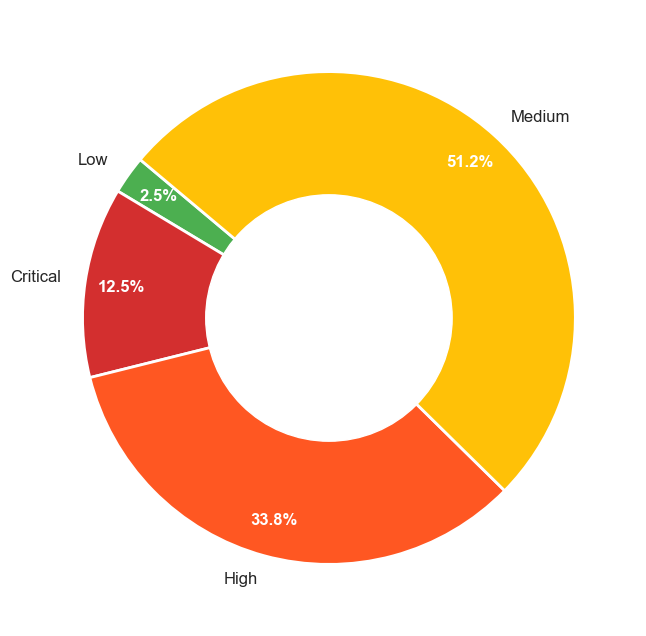

In [45]:
import matplotlib.cm as cm
# Sample data (frequency of each category)
labels = severity.index
sizes = severity.values  # Random values for the categories
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))  # Nice color gradient
colors = [severity_colors[s] for s in labels]

# Create the donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 2}, pctdistance=0.85
)

# Draw a white circle in the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.50, fc="white")
plt.gca().add_artist(center_circle)

# Improve aesthetics
plt.setp(autotexts, size=12, weight="bold", color="white")  # Formatting percentages
plt.setp(texts, size=12)  # Formatting labels
#plt.title("Severity", fontsize=16, fontweight="bold")
# Save as PDF
plt.savefig("plots/proportion_severity.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()

# Text analysis